# Whitening Tutorial
### Author: _Calvin Chi_


# Motivation
Whitening is a common preprocessing step in machine learning that aims to transform the data such that it has the identity covariance  matrix. Once a data set is whitened, its covariance matrix is a diagonal matrix with all entries equal to one. 

Why perform whitening on your data? There are two main reasons for doing so: 

1. Data with independent dimensions are often easier to model statistically.
2. Forcing all dimensions to have equal unit variance treats each dimension with equal importance.

Let us graphically illustrate why whitening might be important with a contour plot. In a contour plot, every point on the contour is the same "distance" from the mean. In the contour plot plotting the real distribution of our hypothetical data below, not only are the two dimensions not independent, but the variance in each dimension is different. If we are blind to the contours, then we might conclude that a point in the y-direction is closer to the mean than a point in the x-direction, even though in reality, they are on the same contour. 

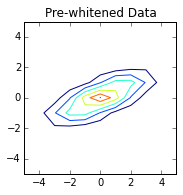

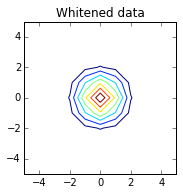

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.mlab import bivariate_normal

x = np.arange(-5, 6, 1)
y = np.arange(-5, 6, 1)
X, Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y, sigmax=2, sigmay=1, mux=0, muy=0, sigmaxy=1.5)
plt.subplot(121)
plt.contour(X, Y, Z)
plt.title("Pre-whitened Data")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Z = bivariate_normal(X, Y, sigmax=1, sigmay=1, mux=0, muy=0, sigmaxy=0)
plt.subplot(122)
plt.contour(X, Y, Z)
plt.title("Whitened data")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

However, if we whiten our data so that the contour plot looks spherical, then one unit in the y-direction will be equal to one unit in the x-direction. 

---

# Deriving the method
Let $X \in \mathbb{R}^{nxd}$ be our data matrix, where $n$ = number of samples and $d$ = number of features. Let us first set our goal to find $W_{D} \in \mathbb{R}^{dxd}$ such that $Y = XW_{D}$, where $Y$ is our transformed data with diagonal covariance matrix. Before diving in, let us also state an equivalence that we know from linear algebra. 

Let $\Sigma$ be the covariance matrix of our data matrix $X$. Since a covariance matrix is by definition symmetric, from linear algebra we know that $\Sigma$ can be decomposed into: 

$$\Sigma = EDE^{-1} = EDE^{T}$$
$$D = E^{-1}\Sigma E = E^{T}\Sigma E$$

Where E is an orthogonal matrix and D is a diagonal matrix containing eigenvalues. For the purposes of the derivation, we assume that $X$ is centered by column, so that we can state: 

$$\Sigma = \frac{X^{T}X}{n}$$

The goal is to find $W_{D}$ such that $Y$ has covariance matrix equal to $D$, or stated mathematically: 

$$D = \frac{Y^{T}Y}{n}$$

## Method 1
We start our derivation with what the covariance matrix of the transformed data $Y$ should be: 

$$D = \frac{Y^{T}Y}{n} = \frac{(XW_{D})^{T}(XW_{D})}{n} = \frac{W_{D}^{T}X^{T}XW_{D}}{n} = W_{D}^{T}\Sigma W_{D}$$

$$\text{Since we know that }D = E^{-1}\Sigma E$$

$$W_{D}^{T}\Sigma W_{D} = E^{-1}\Sigma E$$

$$\text{Hence, }$$

$$W_{D}^{T} = E^{-1} \text{ or } W_{D} = E$$

Thus, multiplying $X$ by $E$ will tranform our data such that it has diagonal covariance matrix. In whitening though, not only are we making the covariance matrix of the transformed data diagonal, but also an identity matrix. To achieve this, we only need to re-state our goal as: 

$$I = \frac{Y^{T}Y}{n}$$

Before we dive into deriving what $W_{W}$ should be such that $XW_{W} = I$, let us state a few linear algebra manipulations that we will be using: 

$$I = D^{-1}D = D^{-\frac{1}{2}}DD^{-\frac{1}{2}} = D^{-\frac{1}{2}}E^{-1}\Sigma ED^{-\frac{1}{2}}$$

$$I = \frac{Y^{T}Y}{n} = \frac{(XW_{W})^{T}(XW_{W})}{n} = \frac{W_{W}^{T}X^{T}XW_{W}}{n} = W_{W}^{T}\Sigma W_{W}$$

$$W_{W}^{T}\Sigma W_{W} = D^{-\frac{1}{2}}E^{-1}\Sigma ED^{-\frac{1}{2}}$$

$$\text{Hence, }$$

$$W_{W}^{T} = D^{-\frac{1}{2}}E^{T}$$
$$W_{W} = ED^{-\frac{1}{2}}$$

## Method 2
Is there a simpler, yet equivalent way of expressing $W_{W} = ED^{-\frac{1}{2}}$? It turns out there is. Let us derive that! 

$$\Sigma^{1/2} = ED^{1/2}E^{-1}$$

$$\Sigma^{-\frac{1}{2}} = (ED^{1/2}E^{-1})^{-1} = ED^{-\frac{1}{2}}E^{-1}$$

$$\Sigma^{-1} = \Sigma^{-\frac{1}{2}}\Sigma^{-\frac{1}{2}} = ED^{-\frac{1}{2}}E^{-1}ED^{-\frac{1}{2}}E^{-1} = ED^{-\frac{1}{2}}D^{-\frac{1}{2}}E^{-1}$$

So $W_{W} = ED^{-\frac{1}{2}} = \Sigma^{-1/2}$ !

---

# Code Demonstration
To demonstrate this, let us generate 50 data points drawn from a multivariate normal distribution with origin as the mean and the covariance matrix: 

$$\Sigma = \begin{bmatrix}
2&1.5\\
1.5&2\\
\end{bmatrix}$$

We plot the 50 data points:

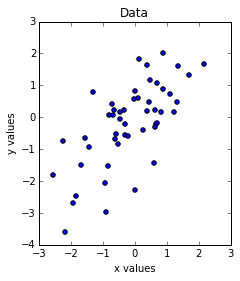

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv as inv

np.random.seed(1)

mu_vec = np.array([0,0])
cov_mat = np.array([[2,1.5],[1.5,2]])
data = np.random.multivariate_normal(mu_vec, cov_mat, 50)

plt.scatter(data[:,0], data[:, 1])
plt.title('Data')
plt.xlabel('x values')
plt.ylabel('y values')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

##Method 1
In method 1 derived above, we find $W_{W} = ED^{-1/2}$ such that: 

$$X_{Whitened} = XW_{W}$$

We implement method 1 to see that it works. 

Covariance matrix of Whitened Data
[[  1.00000000e+00   1.94544980e-16]
 [  1.94544980e-16   1.00000000e+00]]


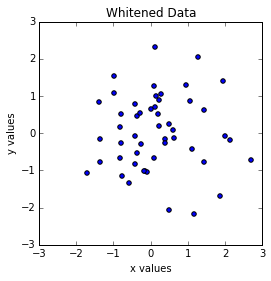

In [39]:
from scipy.linalg import sqrtm

#Find the covariance matrix of the data
cov_mat = np.cov(data.T)
#Call the SVD function from linalg module to perform spectral decomposition on the covariance matrix
U, S, V = np.linalg.svd(cov_mat)
S = np.diag(S)
SInvSr = np.sqrt(inv(S))

W = U.dot(SInvSr)

transformedData = data.dot(W)

cov = np.cov(transformedData.T)
print "Covariance matrix of Whitened Data"
print cov

plt.scatter(transformedData[:,0], transformedData[:, 1])
plt.title('Whitened Data')
plt.xlabel('x values')
plt.ylabel('y values')
plt.ylim([-3, 3])
plt.xlim([-3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Indeed, the transformed data has identity covariance matrix and when plotted, appears spherical!
##Method 2
In method 2 derived above, we find $W_{W} = \Sigma^{-1/2}$ such that: 

$$X_{Whitened} = XW_{W}$$

We implement method 2 to see that it works. 

Covariance matrix of Whitened Data
[[  1.00000000e+00  -8.85540810e-17]
 [ -8.85540810e-17   1.00000000e+00]]


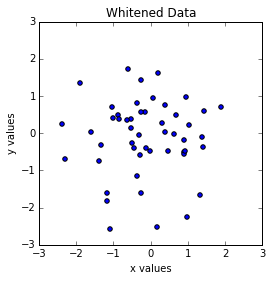

In [40]:
#Find the inverse of the covariance matrix
covInv = inv(cov_mat)
#Find the square root of the inverse covariance matrix
covInvSr = sqrtm(covInv)

transformedData = data.dot(covInvSr)

cov = np.cov(transformedData.T)
print "Covariance matrix of Whitened Data"
print cov

plt.scatter(transformedData[:,0], transformedData[:, 1])
plt.title('Whitened Data')
plt.xlabel('x values')
plt.ylabel('y values')
plt.ylim([-3, 3])
plt.xlim([-3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Indeed, the transformed data has identity covariance matrix and when plotted, appears spherical! To a very close appromixation, method 1 and method 2 give the same transformation. 

This concludes the whitening tutorial.